<a href="https://colab.research.google.com/github/Jeet2561/13sep_Jeet/blob/main/EDAforML_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#from sklearn.preprocessing import OneHotEncoder

In [3]:
df = pd.read_csv(r'retail_sales_dataset.csv')
df

,Transaction ID,Date,Customer ID,Gender,Age,ProductCategory,Quantity,PriceperUnit,TotalAmount
0,1,24-11-23,CUST001,Male,34.0,Beauty,3.0,50.0,150.0
1,2,27-02-23,CUST002,Female,26.0,Clothing,2.0,500.0,1000.0
2,3,13-01-23,CUST003,Male,50.0,Electronics,1.0,30.0,30.0
3,4,21-05-23,CUST004,Male,37.0,Clothing,1.0,500.0,500.0
4,5,06-05-23,CUST005,Male,30.0,Beauty,2.0,50.0,100.0
...,...,...,...,...,...,...,...,...,...
998,999,16-05-23,CUST996,Male,62.0,Clothing,1.0,50.0,50.0
999,1000,17-11-23,CUST997,Male,52.0,Beauty,3.0,30.0,90.0
1000,1001,29-10-23,CUST998,Female,23.0,Beauty,4.0,25.0,100.0
1001,1002,05-12-23,CUST999,Female,36.0,Electronics,3.0,50.0,150.0


# **EDA**

In [4]:
df.shape

(1003, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Transaction ID   1003 non-null   int64  
 1   Date             1000 non-null   object 
 2   Customer ID      1000 non-null   object 
 3   Gender           1000 non-null   object 
 4   Age              1000 non-null   float64
 5   ProductCategory  1000 non-null   object 
 6   Quantity         1000 non-null   float64
 7   PriceperUnit     1000 non-null   float64
 8   TotalAmount      1000 non-null   float64
dtypes: float64(4), int64(1), object(4)
memory usage: 70.7+ KB


In [8]:
df.describe()

,Transaction ID,Age,Quantity,PriceperUnit,TotalAmount
count,1003.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,502.000000,41.39200,2.514000,179.890000,456.000000
std,289.685462,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,251.500000,29.00000,1.000000,30.000000,60.000000
50%,502.000000,42.00000,3.000000,50.000000,135.000000
75%,752.500000,53.00000,4.000000,300.000000,900.000000
max,1003.000000,64.00000,4.000000,500.000000,2000.000000


In [9]:
df.isnull().sum()

,0
Transaction ID,0
Date,3
Customer ID,3
Gender,3
Age,3
ProductCategory,3
Quantity,3
PriceperUnit,3
TotalAmount,3


In [15]:
df = df.dropna()

In [16]:
df

,Transaction ID,Date,Customer ID,Gender,Age,ProductCategory,Quantity,PriceperUnit,TotalAmount
0,1,24-11-23,CUST001,Male,34.0,Beauty,3.0,50.0,150.0
1,2,27-02-23,CUST002,Female,26.0,Clothing,2.0,500.0,1000.0
2,3,13-01-23,CUST003,Male,50.0,Electronics,1.0,30.0,30.0
3,4,21-05-23,CUST004,Male,37.0,Clothing,1.0,500.0,500.0
4,5,06-05-23,CUST005,Male,30.0,Beauty,2.0,50.0,100.0
...,...,...,...,...,...,...,...,...,...
998,999,16-05-23,CUST996,Male,62.0,Clothing,1.0,50.0,50.0
999,1000,17-11-23,CUST997,Male,52.0,Beauty,3.0,30.0,90.0
1000,1001,29-10-23,CUST998,Female,23.0,Beauty,4.0,25.0,100.0
1001,1002,05-12-23,CUST999,Female,36.0,Electronics,3.0,50.0,150.0


In [14]:
df.duplicated().sum()

np.int64(0)

In [17]:
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'ProductCategory', 'Quantity', 'PriceperUnit', 'TotalAmount'],
      dtype='object')

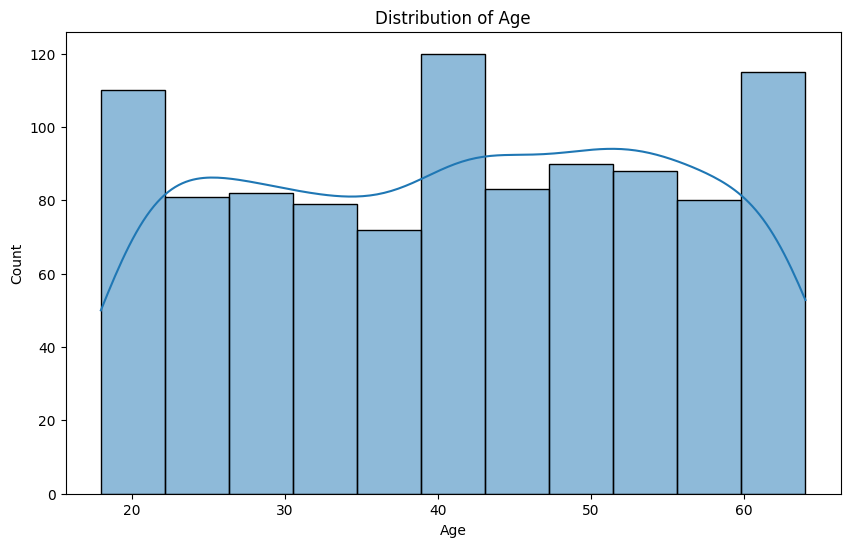

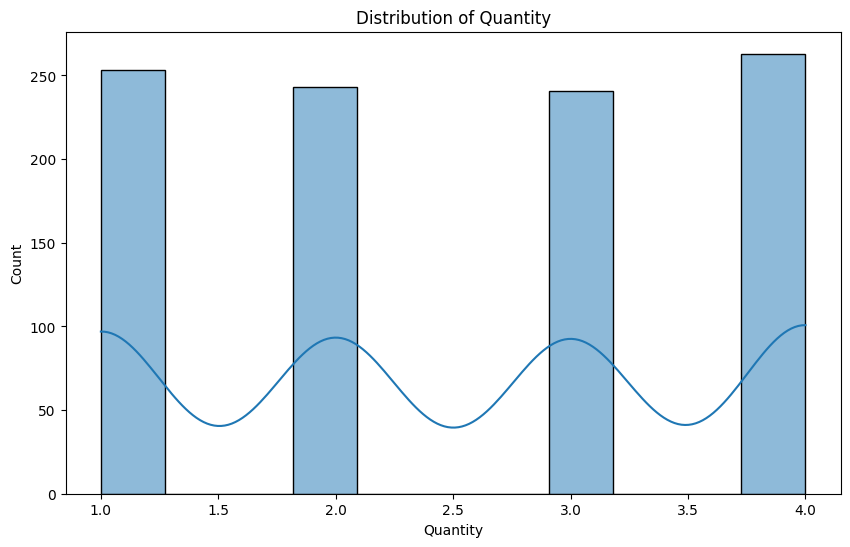

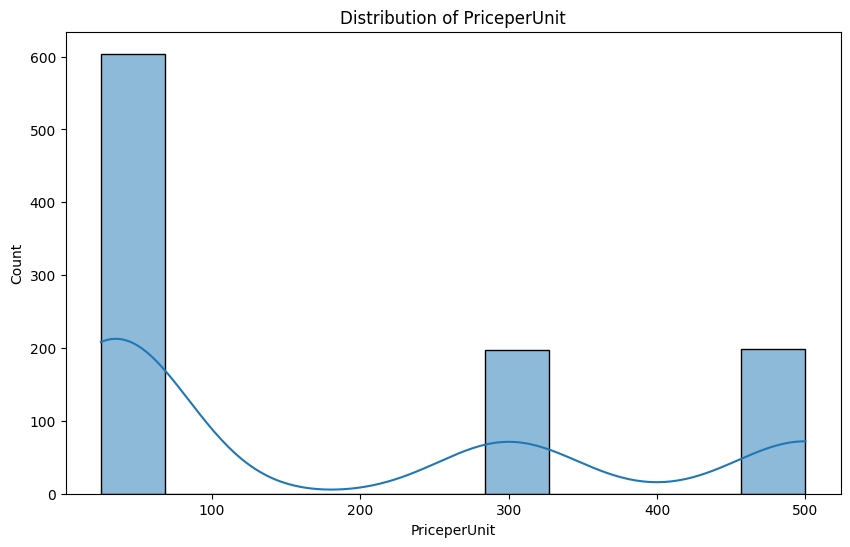

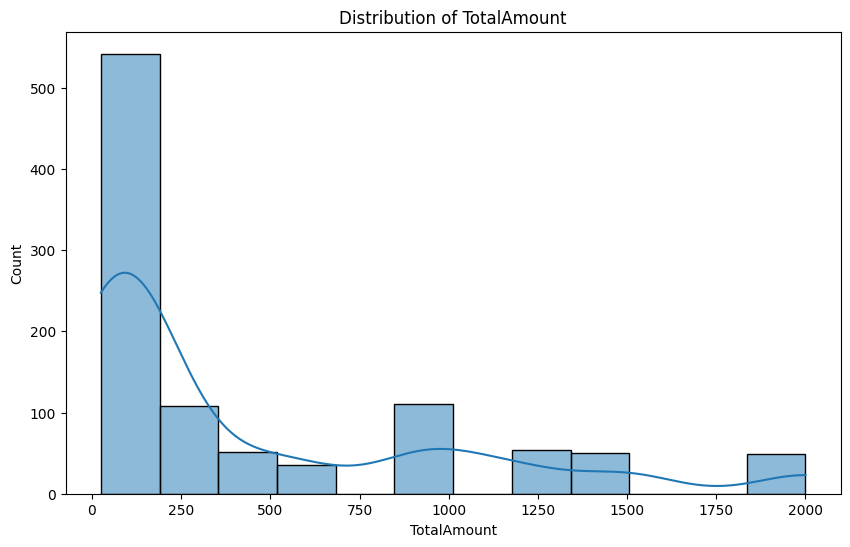

In [21]:
numeric_columns = ['Age','Quantity', 'PriceperUnit', 'TotalAmount']
for columns in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {columns}')
    plt.show()
#

<Axes: xlabel='Gender', ylabel='count'>

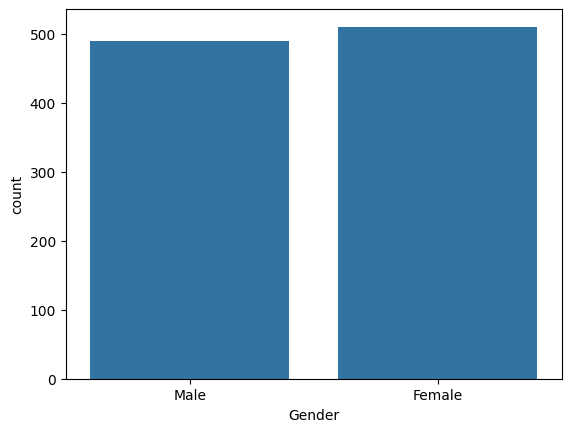

In [22]:
sns.countplot(x = df['Gender'])

<Axes: xlabel='ProductCategory', ylabel='count'>

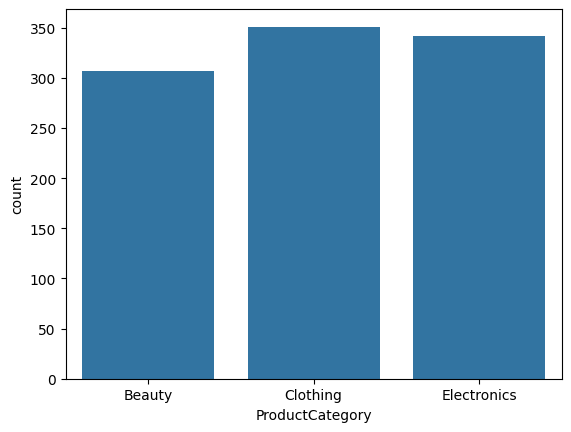

In [23]:
sns.countplot(x = df['ProductCategory'])

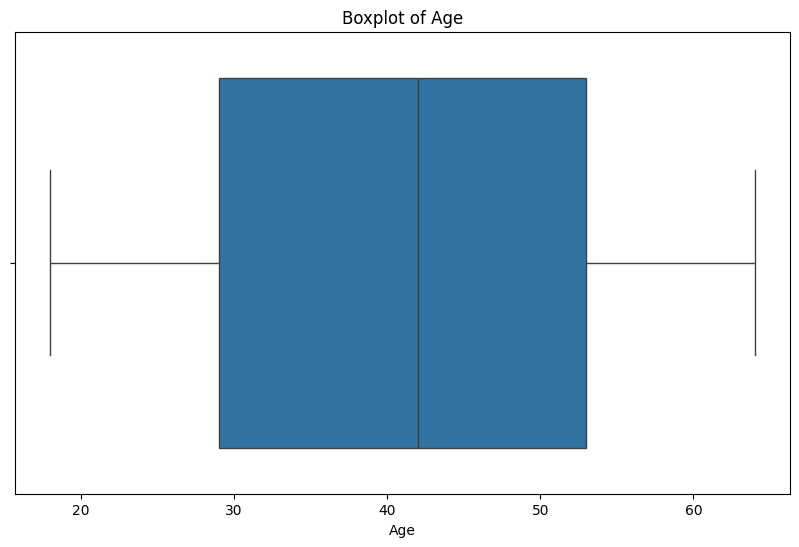

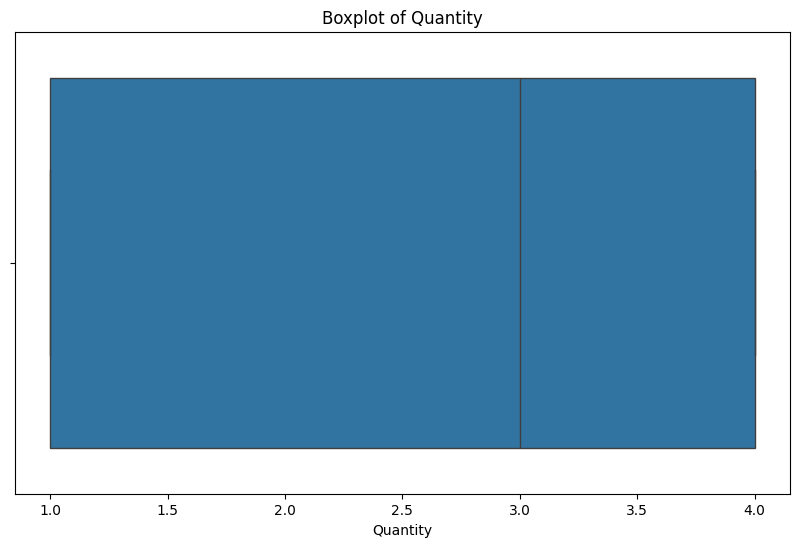

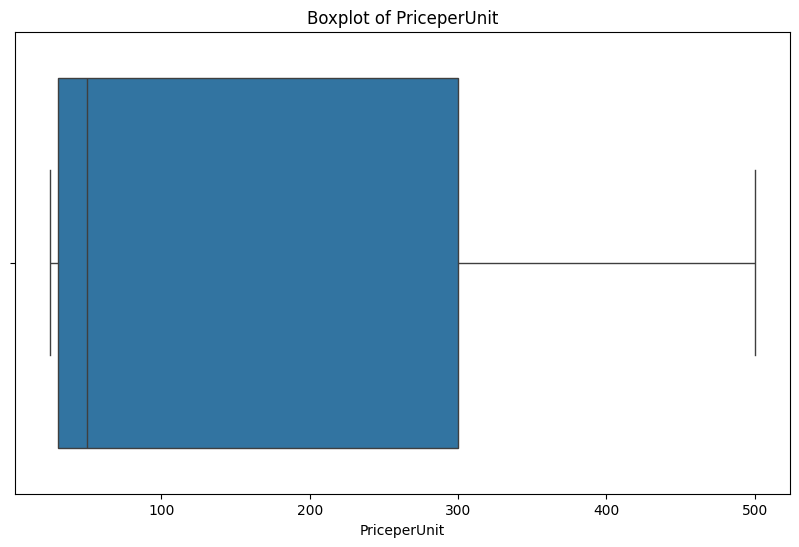

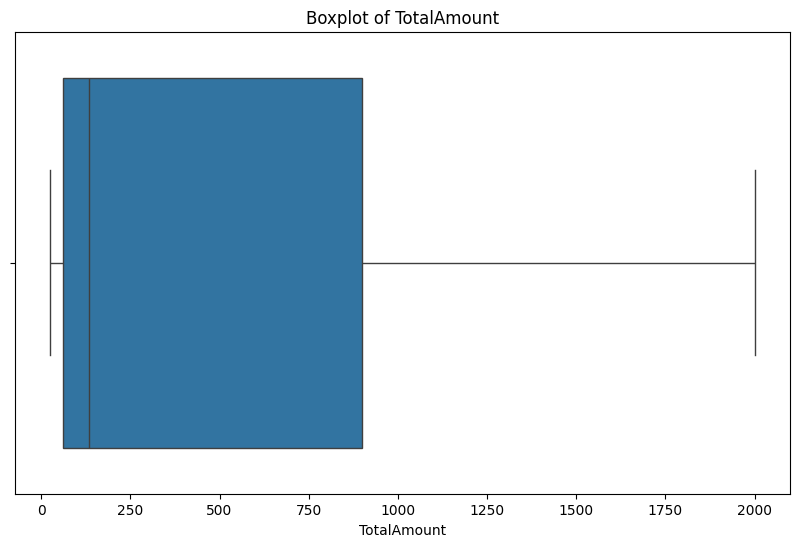

In [24]:
#To detect/get the outliers

for col in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x = df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

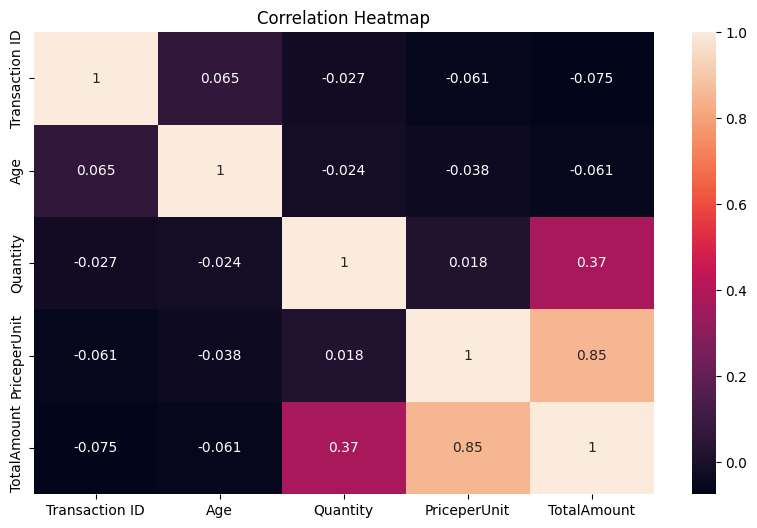

In [26]:
#Correlation of Numeric Values

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only = True),annot=True)
plt.title('Correlation Heatmap')
plt.show()

# **Data Cleaning and Preprocessing**

In [49]:
df_cleaned = df.copy()
df_cleaned.head()

,Transaction ID,Date,Customer ID,Gender,Age,ProductCategory,Quantity,PriceperUnit,TotalAmount
0,1,24-11-23,CUST001,Male,34.0,Beauty,3.0,50.0,150.0
1,2,27-02-23,CUST002,Female,26.0,Clothing,2.0,500.0,1000.0
2,3,13-01-23,CUST003,Male,50.0,Electronics,1.0,30.0,30.0
3,4,21-05-23,CUST004,Male,37.0,Clothing,1.0,500.0,500.0
4,5,06-05-23,CUST005,Male,30.0,Beauty,2.0,50.0,100.0


In [30]:
df_cleaned.drop_duplicates(inplace=True)

In [31]:
df_cleaned.shape

(1000, 9)

In [32]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 1002
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Transaction ID   1000 non-null   int64  
 1   Date             1000 non-null   object 
 2   Customer ID      1000 non-null   object 
 3   Gender           1000 non-null   object 
 4   Age              1000 non-null   float64
 5   ProductCategory  1000 non-null   object 
 6   Quantity         1000 non-null   float64
 7   PriceperUnit     1000 non-null   float64
 8   TotalAmount      1000 non-null   float64
dtypes: float64(4), int64(1), object(4)
memory usage: 110.4+ KB


In [33]:
df_cleaned['Gender'].value_counts()

,count
Gender,
Female,510
Male,490


In [34]:
df_cleaned['ProductCategory'].value_counts()

,count
ProductCategory,
Clothing,351
Electronics,342
Beauty,307


In [50]:
# One Hot Encoding (Suitable for Linear Regression)
df_cleaned = pd.get_dummies(df_cleaned, columns=['Gender', 'ProductCategory'], drop_first=True)
df_cleaned.head()

,Transaction ID,Date,Customer ID,Age,Quantity,PriceperUnit,TotalAmount,Gender_Male,ProductCategory_Clothing,ProductCategory_Electronics
0,1,24-11-23,CUST001,34.0,3.0,50.0,150.0,True,False,False
1,2,27-02-23,CUST002,26.0,2.0,500.0,1000.0,False,True,False
2,3,13-01-23,CUST003,50.0,1.0,30.0,30.0,True,False,True
3,4,21-05-23,CUST004,37.0,1.0,500.0,500.0,True,True,False
4,5,06-05-23,CUST005,30.0,2.0,50.0,100.0,True,False,False


In [52]:
#Convert all the boolean values 0 and 1
bool_cols = df_cleaned.select_dtypes(include='bool').columns
df_cleaned[bool_cols] = df_cleaned[bool_cols].astype(int)
df_cleaned

,Transaction ID,Date,Customer ID,Age,Quantity,PriceperUnit,TotalAmount,Gender_Male,ProductCategory_Clothing,ProductCategory_Electronics
0,1,24-11-23,CUST001,34.0,3.0,50.0,150.0,1,0,0
1,2,27-02-23,CUST002,26.0,2.0,500.0,1000.0,0,1,0
2,3,13-01-23,CUST003,50.0,1.0,30.0,30.0,1,0,1
3,4,21-05-23,CUST004,37.0,1.0,500.0,500.0,1,1,0
4,5,06-05-23,CUST005,30.0,2.0,50.0,100.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
998,999,16-05-23,CUST996,62.0,1.0,50.0,50.0,1,1,0
999,1000,17-11-23,CUST997,52.0,3.0,30.0,90.0,1,0,0
1000,1001,29-10-23,CUST998,23.0,4.0,25.0,100.0,0,0,0
1001,1002,05-12-23,CUST999,36.0,3.0,50.0,150.0,0,0,1


In [53]:
df_cleaned.dtypes

,0
Transaction ID,int64
Date,object
Customer ID,object
Age,float64
Quantity,float64
PriceperUnit,float64
TotalAmount,float64
Gender_Male,int64
ProductCategory_Clothing,int64
ProductCategory_Electronics,int64


# **Feature Extraction and Engineering**

In [56]:
#Convert Date to datetime and extract useful parts:
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], format='%d-%m-%y')
df_cleaned['Day'] = df_cleaned['Date'].dt.day
df_cleaned['Month'] = df_cleaned['Date'].dt.month
df_cleaned['Weekday'] = df_cleaned['Date'].dt.weekday
df_cleaned['IsWeekend'] = df_cleaned['Weekday'].isin([5, 6]).astype(int)
df_cleaned.head()

,Transaction ID,Date,Customer ID,Age,Quantity,PriceperUnit,TotalAmount,Gender_Male,ProductCategory_Clothing,ProductCategory_Electronics,Day,Month,Weekday,IsWeekend
0,1,2023-11-24,CUST001,34.0,3.0,50.0,150.0,1,0,0,24,11,4,0
1,2,2023-02-27,CUST002,26.0,2.0,500.0,1000.0,0,1,0,27,2,0,0
2,3,2023-01-13,CUST003,50.0,1.0,30.0,30.0,1,0,1,13,1,4,0
3,4,2023-05-21,CUST004,37.0,1.0,500.0,500.0,1,1,0,21,5,6,1
4,5,2023-05-06,CUST005,30.0,2.0,50.0,100.0,1,0,0,6,5,5,1


In [ ]:
#Drop irrelevant columns:
#df_cleaned = df_cleaned.drop(columns=['Transaction ID', 'Customer ID', 'Date'])

In [68]:
#Create new numerical features:
df_cleaned['AgeQty'] = df_cleaned['Age'] * df_cleaned['Quantity']
#df_cleaned.drop(columns=['SpendPerItem'], inplace=True)
df_cleaned

,Transaction ID,Date,Customer ID,Age,Quantity,PriceperUnit,TotalAmount,Gender_Male,ProductCategory_Clothing,ProductCategory_Electronics,Day,Month,Weekday,IsWeekend,AgeQty
0,1,2023-11-24,CUST001,34.0,3.0,50.0,150.0,1,0,0,24,11,4,0,102.0
1,2,2023-02-27,CUST002,26.0,2.0,500.0,1000.0,0,1,0,27,2,0,0,52.0
2,3,2023-01-13,CUST003,50.0,1.0,30.0,30.0,1,0,1,13,1,4,0,50.0
3,4,2023-05-21,CUST004,37.0,1.0,500.0,500.0,1,1,0,21,5,6,1,37.0
4,5,2023-05-06,CUST005,30.0,2.0,50.0,100.0,1,0,0,6,5,5,1,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,999,2023-05-16,CUST996,62.0,1.0,50.0,50.0,1,1,0,16,5,1,0,62.0
999,1000,2023-11-17,CUST997,52.0,3.0,30.0,90.0,1,0,0,17,11,4,0,156.0
1000,1001,2023-10-29,CUST998,23.0,4.0,25.0,100.0,0,0,0,29,10,6,1,92.0
1001,1002,2023-12-05,CUST999,36.0,3.0,50.0,150.0,0,0,1,5,12,1,0,108.0
